# LDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
#%% Get dataset
data1 = pd.read_excel("Sujet1.xlsx",sheet_name=0,header=0,index_col=0)
X1=data1.dropna() #si j'ai de valeurs manquant je le suprimme

data2 = pd.read_excel("Sujet2.xlsx",sheet_name=0,header=0,index_col=0)
X2=data2.dropna() #si j'ai de valeurs manquant je le suprimme

data3 = pd.read_excel("Sujet3.xlsx",sheet_name=0,header=0,index_col=0)
X3=data3.dropna() #si j'ai de valeurs manquant je le suprimme

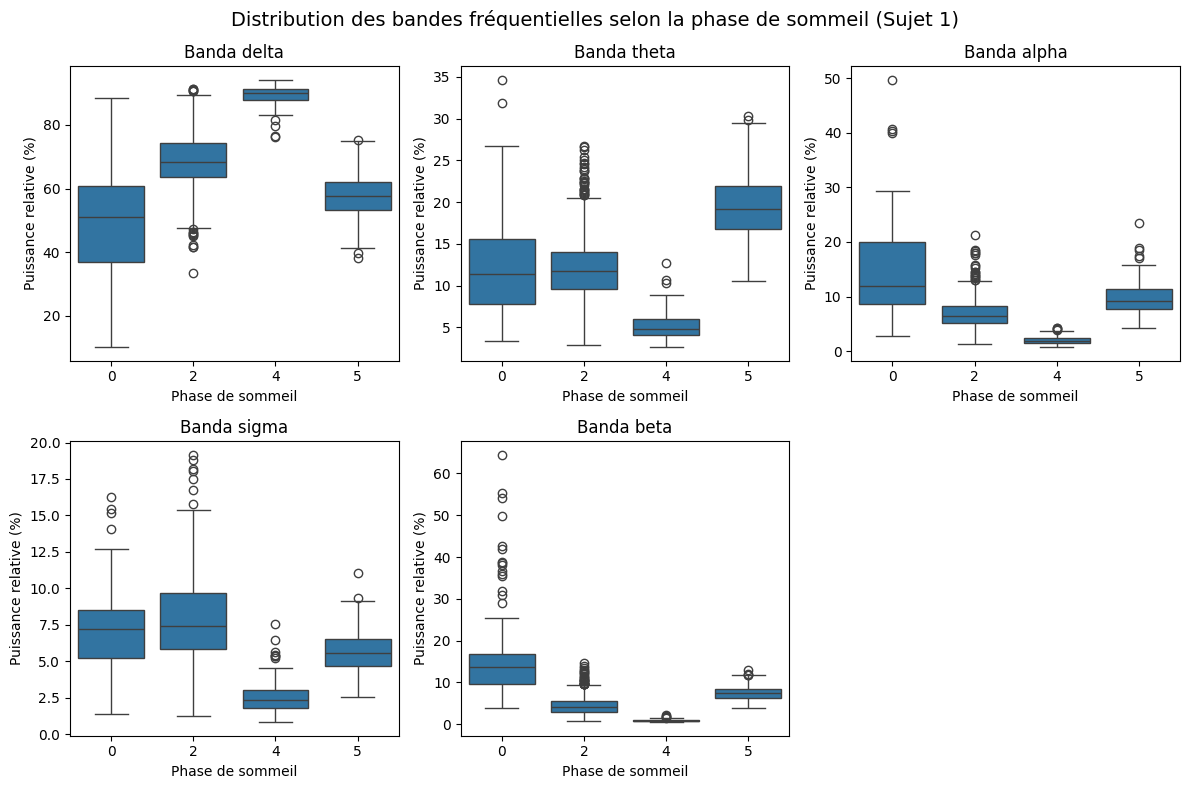

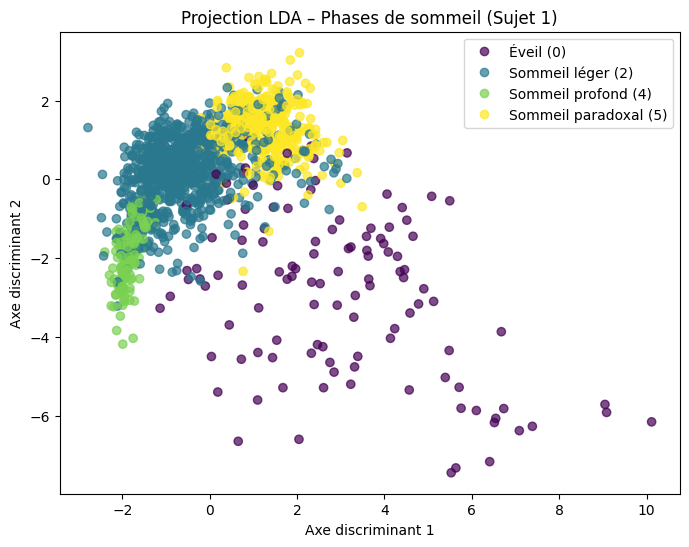

In [3]:
# Boxplots 
#%% Criação dos boxplots=
X=X1

bands = ['delta', 'theta', 'alpha', 'sigma', 'beta']

plt.figure(figsize=(12, 8))

# IA
for i, band in enumerate(bands, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='phase', y=band, data=X)
    plt.title(f'Banda {band}')
    plt.xlabel('Phase de sommeil')
    plt.ylabel('Puissance relative (%)')

plt.suptitle("Distribution des bandes fréquentielles selon la phase de sommeil (Sujet 1)", fontsize=14)
plt.tight_layout()
plt.show()


#%% 
# Analyse discriminante
n,p=X.shape
# Removendo colunas que não queremos analisar
# Alvo -> classe = phase 

y = X['phase']
X = X[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX = X.drop(columns=['beta']) # no enunciado esta indicado
XX.describe()

lda_1 = LinearDiscriminantAnalysis() # On veut projeter sur 2 axes pour visualiser
X_lda = lda_1.fit_transform(XX, y)



#%% Visualisation
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_lda[:,0], X_lda[:,1], c=y, alpha=0.7)
plt.xlabel('Axe discriminant 1')
plt.ylabel('Axe discriminant 2')
plt.title('Projection LDA – Phases de sommeil (Sujet 1)')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Éveil (0)', 'Sommeil léger (2)', 'Sommeil profond (4)', 'Sommeil paradoxal (5)'],
           loc='best')
plt.show()

lda_df = pd.DataFrame(lda_1.coef_, columns=['delta', 'theta', 'alpha', 'sigma','puissance'],
                      index=['Éveil (0)', 'Sommeil léger (2)', 'Sommeil profond (4)', 'Sommeil paradoxal (5)'])

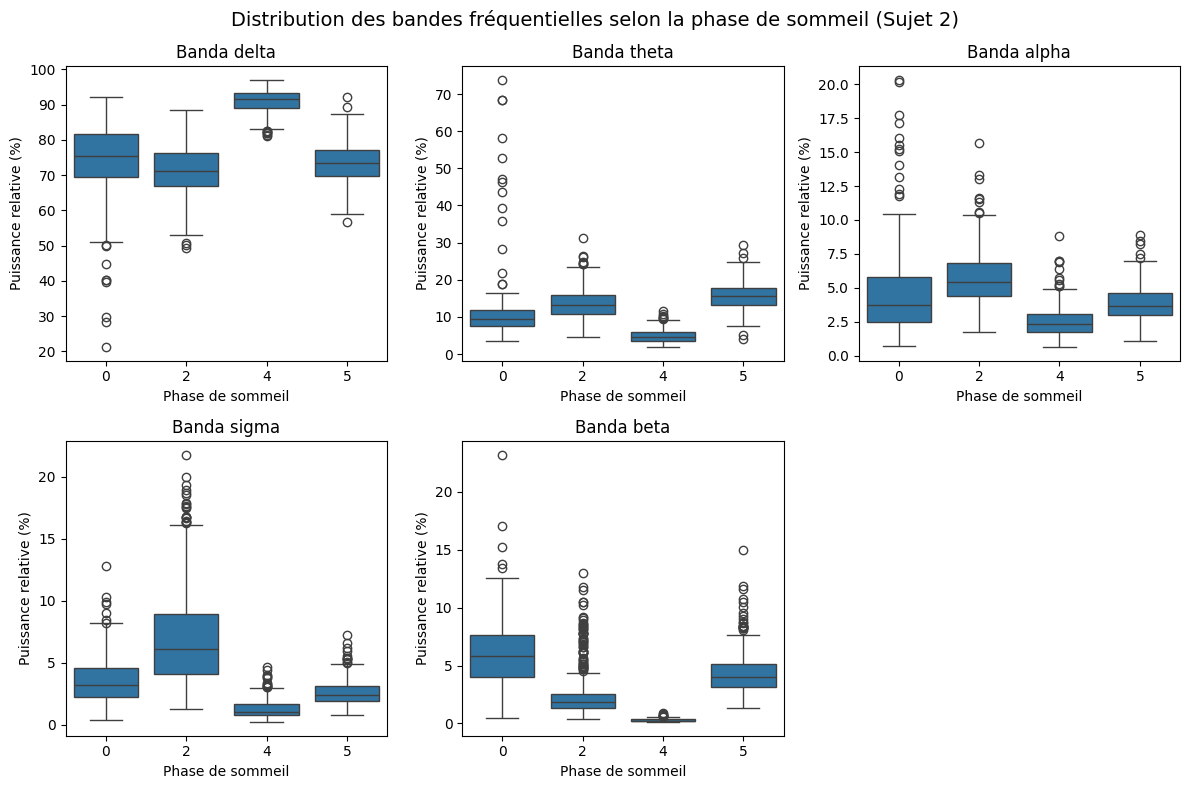

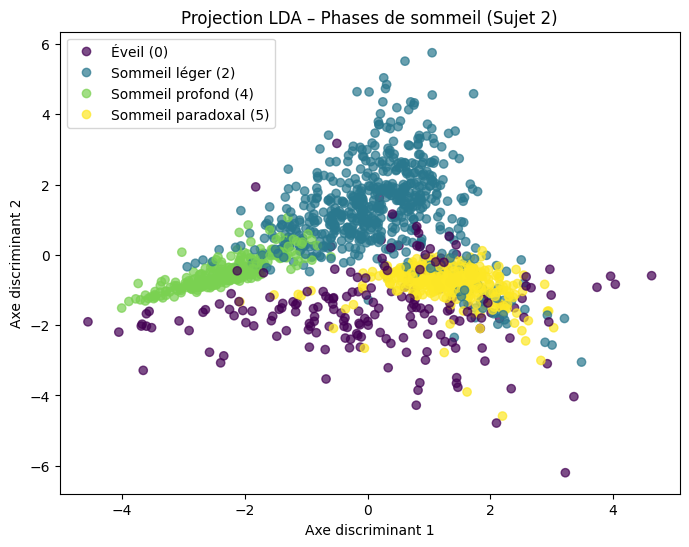

In [4]:
# Boxplots 
#%% Criação dos boxplots=
X=X2

bands = ['delta', 'theta', 'alpha', 'sigma', 'beta']

plt.figure(figsize=(12, 8))

# IA
for i, band in enumerate(bands, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='phase', y=band, data=X)
    plt.title(f'Banda {band}')
    plt.xlabel('Phase de sommeil')
    plt.ylabel('Puissance relative (%)')

plt.suptitle("Distribution des bandes fréquentielles selon la phase de sommeil (Sujet 2)", fontsize=14)
plt.tight_layout()
plt.show()


#%% 
# Analyse discriminante
n,p=X.shape
# Removendo colunas que não queremos analisar
# Alvo -> classe = phase 

y = X['phase']
X = X[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX = X.drop(columns=['beta']) # no enunciado esta indicado
XX.describe()

lda_2 = LinearDiscriminantAnalysis() # On veut projeter sur 2 axes pour visualiser
X_lda = lda_2.fit_transform(XX, y)


#%% Visualisation
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_lda[:,0], X_lda[:,1], c=y, alpha=0.7)
plt.xlabel('Axe discriminant 1')
plt.ylabel('Axe discriminant 2')
plt.title('Projection LDA – Phases de sommeil (Sujet 2)')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Éveil (0)', 'Sommeil léger (2)', 'Sommeil profond (4)', 'Sommeil paradoxal (5)'],
           loc='best')
plt.show()

lda_df = pd.DataFrame(lda_2.coef_, columns=['delta', 'theta', 'alpha', 'sigma','puissance'],
                      index=['Éveil (0)', 'Sommeil léger (2)', 'Sommeil profond (4)', 'Sommeil paradoxal (5)'])

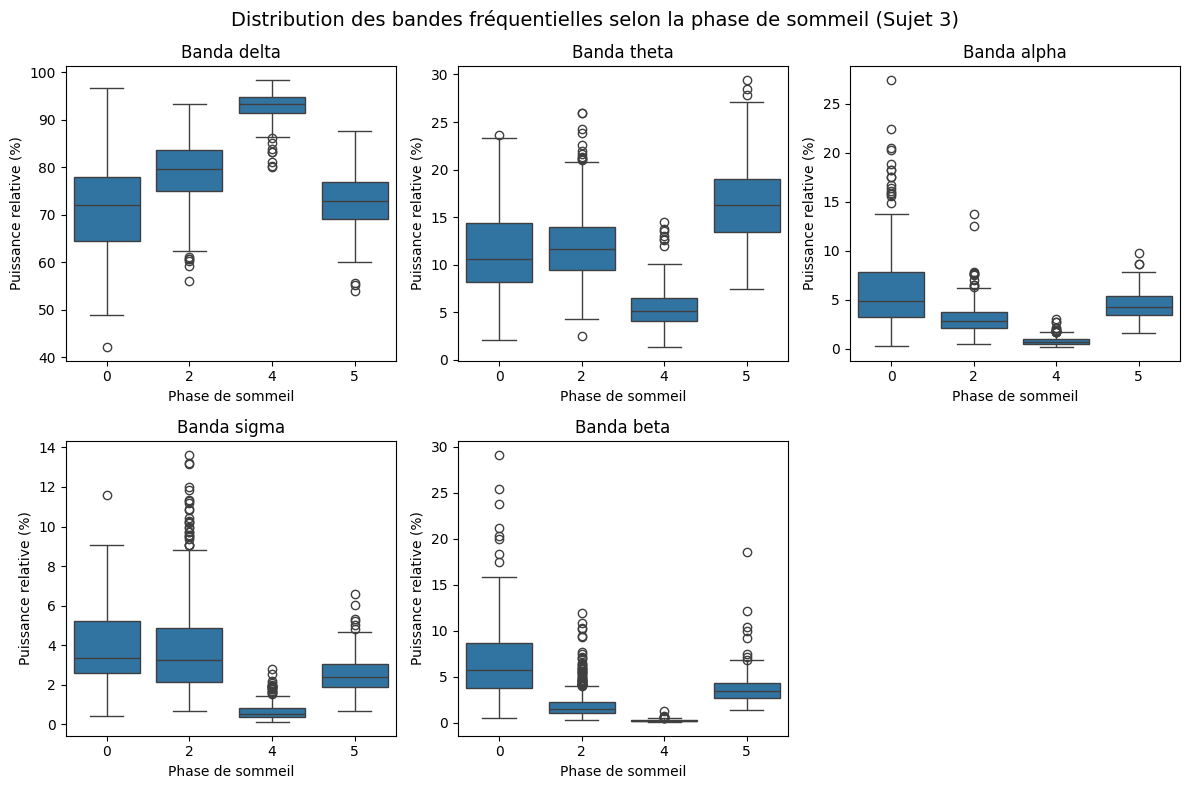

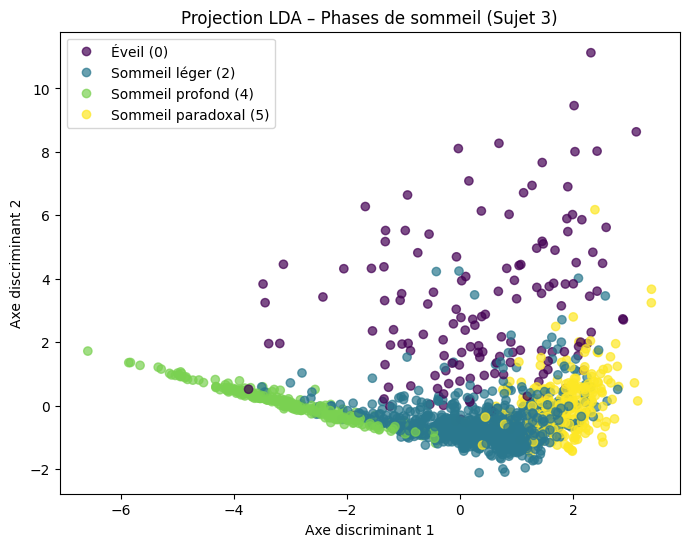

In [5]:
# Boxplots 
#%% Criação dos boxplots=
X=X3

bands = ['delta', 'theta', 'alpha', 'sigma', 'beta']

plt.figure(figsize=(12, 8))

# IA
for i, band in enumerate(bands, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='phase', y=band, data=X)
    plt.title(f'Banda {band}')
    plt.xlabel('Phase de sommeil')
    plt.ylabel('Puissance relative (%)')

plt.suptitle("Distribution des bandes fréquentielles selon la phase de sommeil (Sujet 3)", fontsize=14)
plt.tight_layout()
plt.show()


#%% 
# Analyse discriminante
n,p=X.shape
# Removendo colunas que não queremos analisar
# Alvo -> classe = phase 

y = X['phase']
X = X[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX = X.drop(columns=['beta']) # no enunciado esta indicado
XX.describe()

lda_3 = LinearDiscriminantAnalysis() # On veut projeter sur 2 axes pour visualiser
X_lda = lda_3.fit_transform(XX, y)



#%% Visualisation
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_lda[:,0], X_lda[:,1], c=y, alpha=0.7)
plt.xlabel('Axe discriminant 1')
plt.ylabel('Axe discriminant 2')
plt.title('Projection LDA – Phases de sommeil (Sujet 3)')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Éveil (0)', 'Sommeil léger (2)', 'Sommeil profond (4)', 'Sommeil paradoxal (5)'],
           loc='best')
plt.show()

lda_df = pd.DataFrame(lda_3.coef_, columns=['delta', 'theta', 'alpha', 'sigma','puissance'],
                      index=['Éveil (0)', 'Sommeil léger (2)', 'Sommeil profond (4)', 'Sommeil paradoxal (5)'])

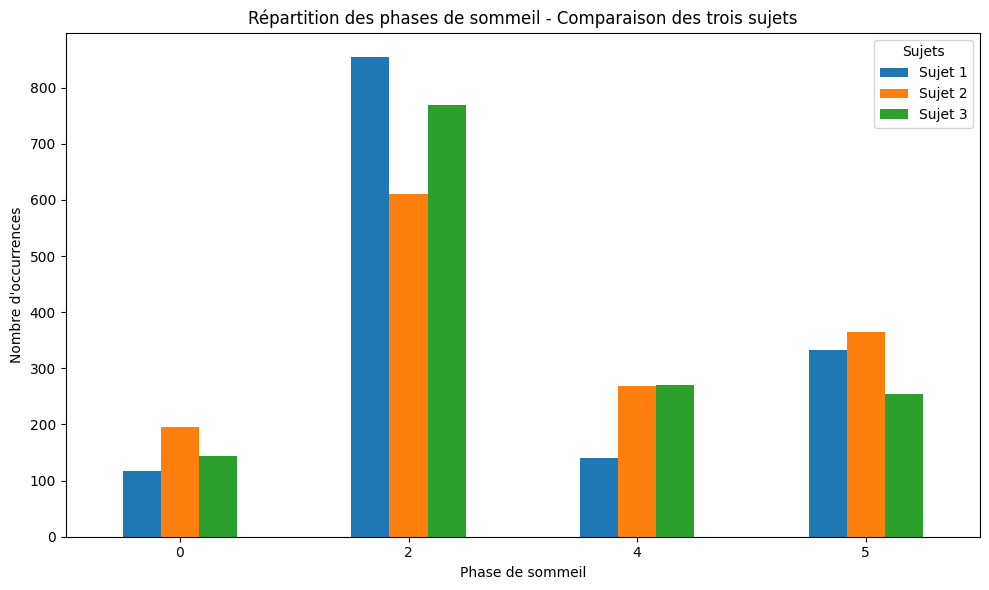

In [6]:
# Isso aqui foi IA

# Leitura dos dados
data1 = pd.read_excel("Sujet1.xlsx", sheet_name=0, header=0, index_col=0)
data2 = pd.read_excel("Sujet2.xlsx", sheet_name=0, header=0, index_col=0)
data3 = pd.read_excel("Sujet3.xlsx", sheet_name=0, header=0, index_col=0)

# Contagem das fases
counts1 = data1['phase'].value_counts().sort_index()
counts2 = data2['phase'].value_counts().sort_index()
counts3 = data3['phase'].value_counts().sort_index()

# Criação do DataFrame para comparação
df_counts = pd.DataFrame({
    'Sujet 1': counts1,
    'Sujet 2': counts2,
    'Sujet 3': counts3
}).fillna(0)  # preencher com 0 caso alguma fase não exista em algum sujeito

# Plotagem do histograma
df_counts.plot(kind='bar', figsize=(10,6))
plt.title("Répartition des phases de sommeil - Comparaison des trois sujets")
plt.xlabel("Phase de sommeil")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=0)
plt.legend(title="Sujets")
plt.tight_layout()
plt.show()

# 2.2 

Sujet 1 - Accuracy: 0.818
Sujet 1 - Balanced Accuracy: 0.757

Sujet 2 - Accuracy: 0.792
Sujet 2 - Balanced Accuracy: 0.768

Sujet 3 - Accuracy: 0.865
Sujet 3 - Balanced Accuracy: 0.852



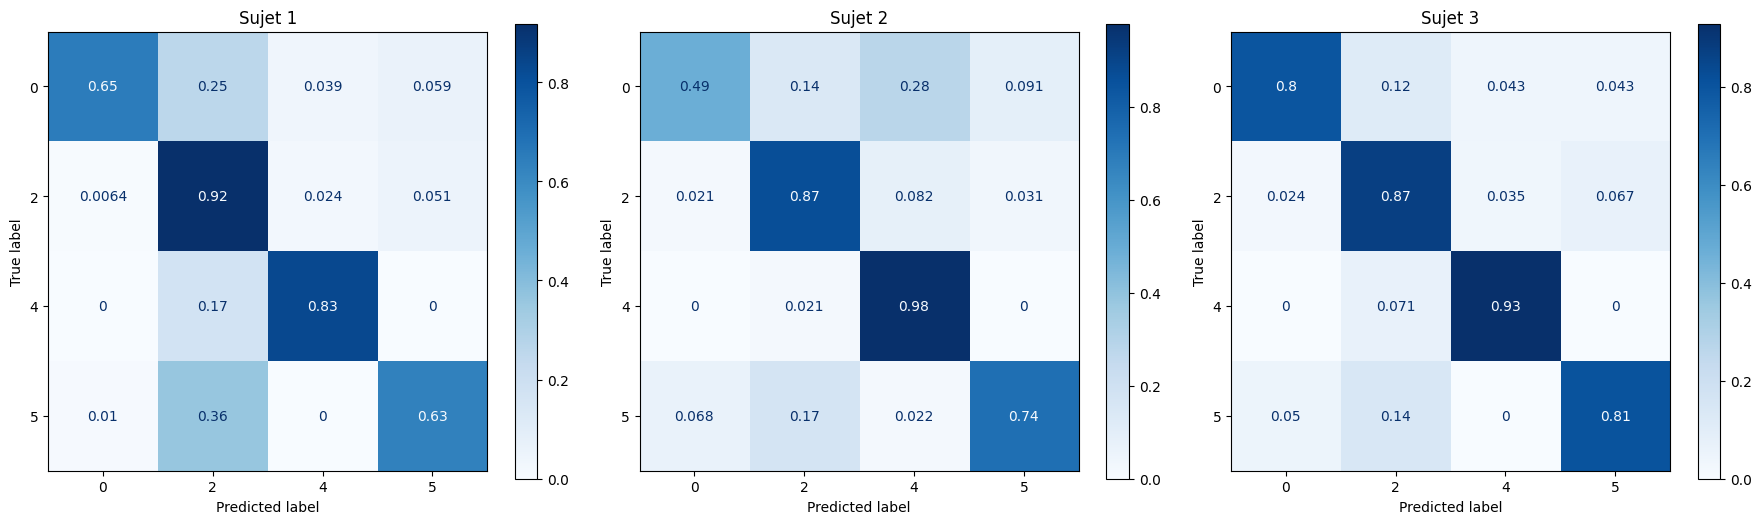

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, accuracy_score
import matplotlib.pyplot as plt

# Listas de dados e modelos
datasets = [X1, X2, X3]
ldas = [lda_1, lda_2, lda_3]

# Rótulos das classes (as fases do sono)
""""
0 : éveil
2 : sommeil léger
4 : sommeil profond
5 : sommeil paradoxal
"""
class_labels = ['0', '2', '4', '5']

# Criar subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (data, lda) in enumerate(zip(datasets, ldas)):
    # Separar features e rótulos
    X_features = data[['delta', 'theta', 'alpha', 'sigma', 'puissance']]
    y_labels = data['phase']

    # (Opcional) Garantir que só as classes desejadas estão sendo usadas
    y_labels = y_labels[y_labels.isin([0, 2, 4, 5])]
    X_features = X_features.loc[y_labels.index]

    # Separar treino e validação
    X_train = X_features.iloc[0:420]
    y_train = y_labels.iloc[0:420]
    X_test = X_features.iloc[420:]
    y_test = y_labels.iloc[420:]

    # Treinar LDA
    lda.fit(X_train, y_train)
    y_pred = lda.predict(X_test)

    # Matriz de confusão normalizada
    cm = confusion_matrix(y_test, y_pred, labels=[0, 2, 4, 5], normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap='Blues', ax=axes[i], colorbar=True)
    axes[i].set_title(f"Sujet {i+1}")

    # Acurácia
    acc = accuracy_score(y_test, y_pred)
    print(f"Sujet {i+1} - Accuracy: {acc:.3f}")
    # Acurácia balanceada
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    print(f"Sujet {i+1} - Balanced Accuracy: {bal_acc:.3f}\n")

plt.tight_layout()
plt.show()
